In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
mpl.rcParams['figure.figsize'] = (5.33,4)
mpl.rcParams['axes.labelsize'] = 10  # Example: 14 points
mpl.rcParams['xtick.labelsize'] = 8  # Example: 12 points for x-axis ticks
mpl.rcParams['ytick.labelsize'] = 8  # Example: 12 points for y-axis ticks

In [10]:
#Configuration of Keras backend (JAX) using only CPU
import os
os.environ["KERAS_BACKEND"] = "jax"
os.environ["JAX_PLATFORMS"] = ""

In [11]:
from keras.datasets import fashion_mnist
# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(f'{X_train.shape = }\n{X_test.shape = }')
print(f'{y_train.shape = }\n{y_test.shape = }')
print(f'{X_train.max() = }\n{X_train.min() = }')
print(f'{X_test.max() = }\n{X_test.min() = }')
print(f'{np.unique(y_train) = }')

X_train.shape = (60000, 28, 28)
X_test.shape = (10000, 28, 28)
y_train.shape = (60000,)
y_test.shape = (10000,)
X_train.max() = 255
X_train.min() = 0
X_test.max() = 255
X_test.min() = 0
np.unique(y_train) = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)


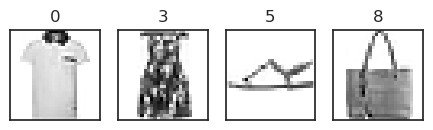

In [4]:
with sns.axes_style('white'):
    for i,idx in enumerate(np.random.randint(0, X_train.shape[0], 4)):
        plt.subplot(1, 4, i+1)
        plt.imshow(X_train[idx], cmap=plt.cm.gray_r)
        plt.title(y_train[idx])
        plt.xticks([]) 
        plt.yticks([]) 

In [5]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()
# shuffle training data...
rindex = np.arange(X_train.shape[0])
np.random.shuffle(rindex)
X_train = X_train[rindex].copy()
y_train = y_train[rindex].copy()
print(f'{X_train.shape = }\n{X_test.shape = }')
print(f'{y_train.shape = }\n{y_test.shape = }')
print(f'{X_train.max() = }\n{X_train.min() = }')
print(f'{X_test.max() = }\n{X_test.min() = }')
print(f'{np.unique(y_train) = }')

X_train.shape = (60000, 28, 28)
X_test.shape = (10000, 28, 28)
y_train.shape = (60000,)
y_test.shape = (10000,)
X_train.max() = 1.0
X_train.min() = 0.0
X_test.max() = 1.0
X_test.min() = 0.0
np.unique(y_train) = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)


In [6]:
from keras import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense

num_classes = np.unique(y_train).size
# explicit number of channels: grey-scale = 1
input_shape = *X_train[0].shape , 1

model = Sequential([
        Input(shape=input_shape),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation="relu"),
        Conv2D(128, kernel_size=(3, 3), activation="relu"),
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/80
 435/1500 ━━━━━━━━━━━━━━━━━━━━ 2:08 121ms/step - accuracy: 0.4210 - loss: 1.5137

KeyboardInterrupt: 

In [ ]:
hist = pd.DataFrame(history.history)
hist.head()

In [ ]:
hist = pd.DataFrame(history.history)
hist.index += 1
hist.head()

In [ ]:
hist[['loss','val_loss']].plot()

In [ ]:
hist[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(X_test,  y_test, verbose=0)

In [12]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
#help(Conv2D)